#### Report by: Cyril Gebara and Tommaso Mercaldo

# Real or Not? NLP with Disaster Tweets
## Predict which Tweets are about real disasters and which ones are not


In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Visualization
Before proceeding with our data modelling and analysis we decided to have an overlook on the dataset. This was made by following some advices from NLP theory and some insights discovered during the process. We strongly believe that our Data visualization helped us to learn a lot from our dataset. The most important part treated in our visualization is surely feature creation and respective target distribution. At the beginning of our work we had many issues improving the model and understanding if and how creating new features will improve our model.

### **Missing Values**
Training and test set have same ratio of missing values in features `keyword` and `location`.
* **0.8%** for `keyword` 
* **33%** for `location` 

Since missing value ratios between training and test set are too close, they are most probably taken from the same sample. Afterwords keyword and location are going to be removed.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=test[missing_cols].isnull().sum().index, y=train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test[missing_cols].isnull().sum().index, y=test[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

<Figure size 1700x400 with 2 Axes>

##### Target distribution on keyword
Visualization of what we can detect from keyword, we can see that is avery interesting feature for the target definition. Keeping this in mind we continue with the data understanding, we decided anyways to drop it in the further steps because it was very difficult to improve our model using it. Anyways we provide here a small visualization of what can say keyword as a feature in relation to the target variable.

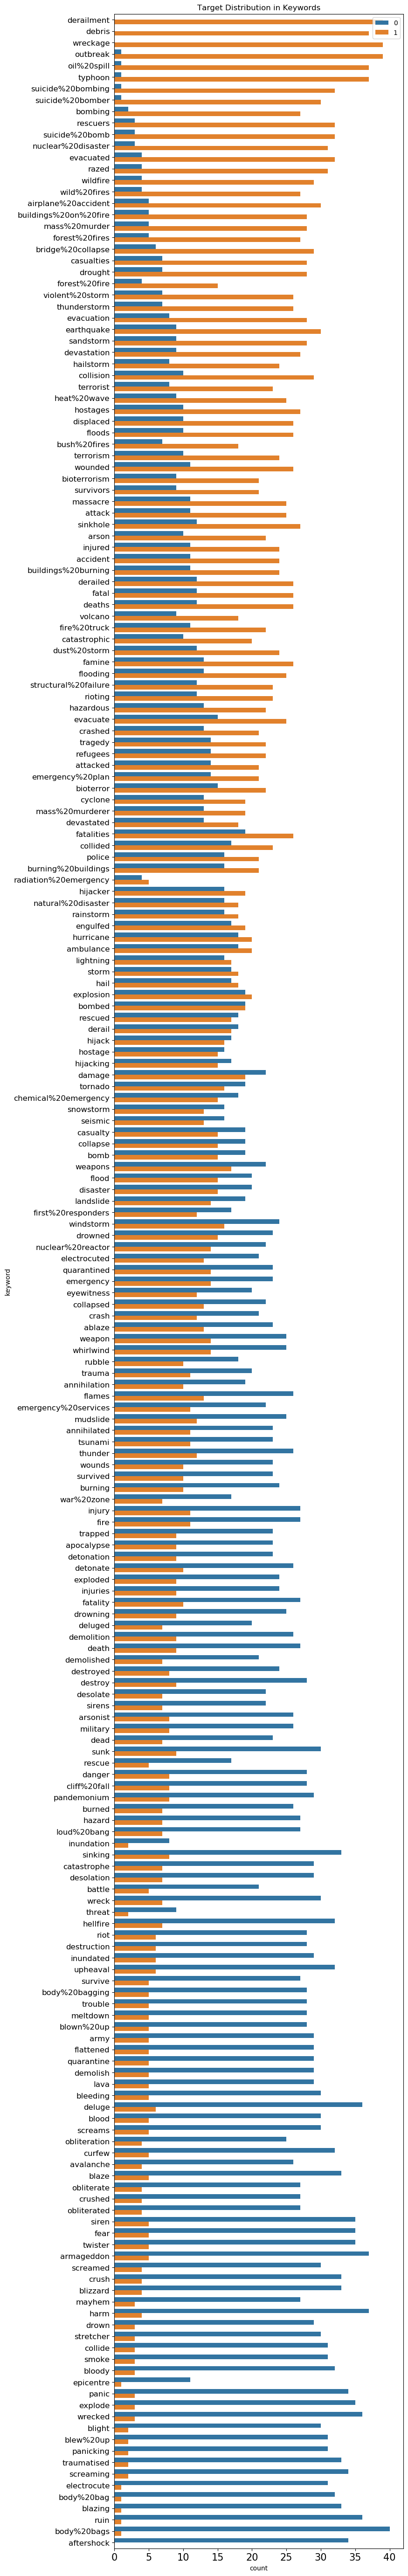

In [3]:
train['target_mean'] = train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train.drop(columns=['target_mean'], inplace=True)

### **Possible new features**
New features can be helpful to identify disaster. The new features used for the analysis are: ## Cycy this part use it when you do feature creation
* `word_count` number of words in text
* `unique_word_count` number of unique words in text
* `stop_word_count` number of stop words in text
* `mean_word_length` average character count in words
* `char_count` number of characters in text
* `punctuation_count` number of punctuations in text
* `url_count` number of urls in text
* `hashtag_count` number of hashtags (#) in text
* `mention_count` number of mentions (@) in text



In [4]:
# punctuation_count
import string
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# stop_word_count
from wordcloud import STOPWORDS
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))

# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))


# mean_word_length
import numpy as np
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# url_count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test['url_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

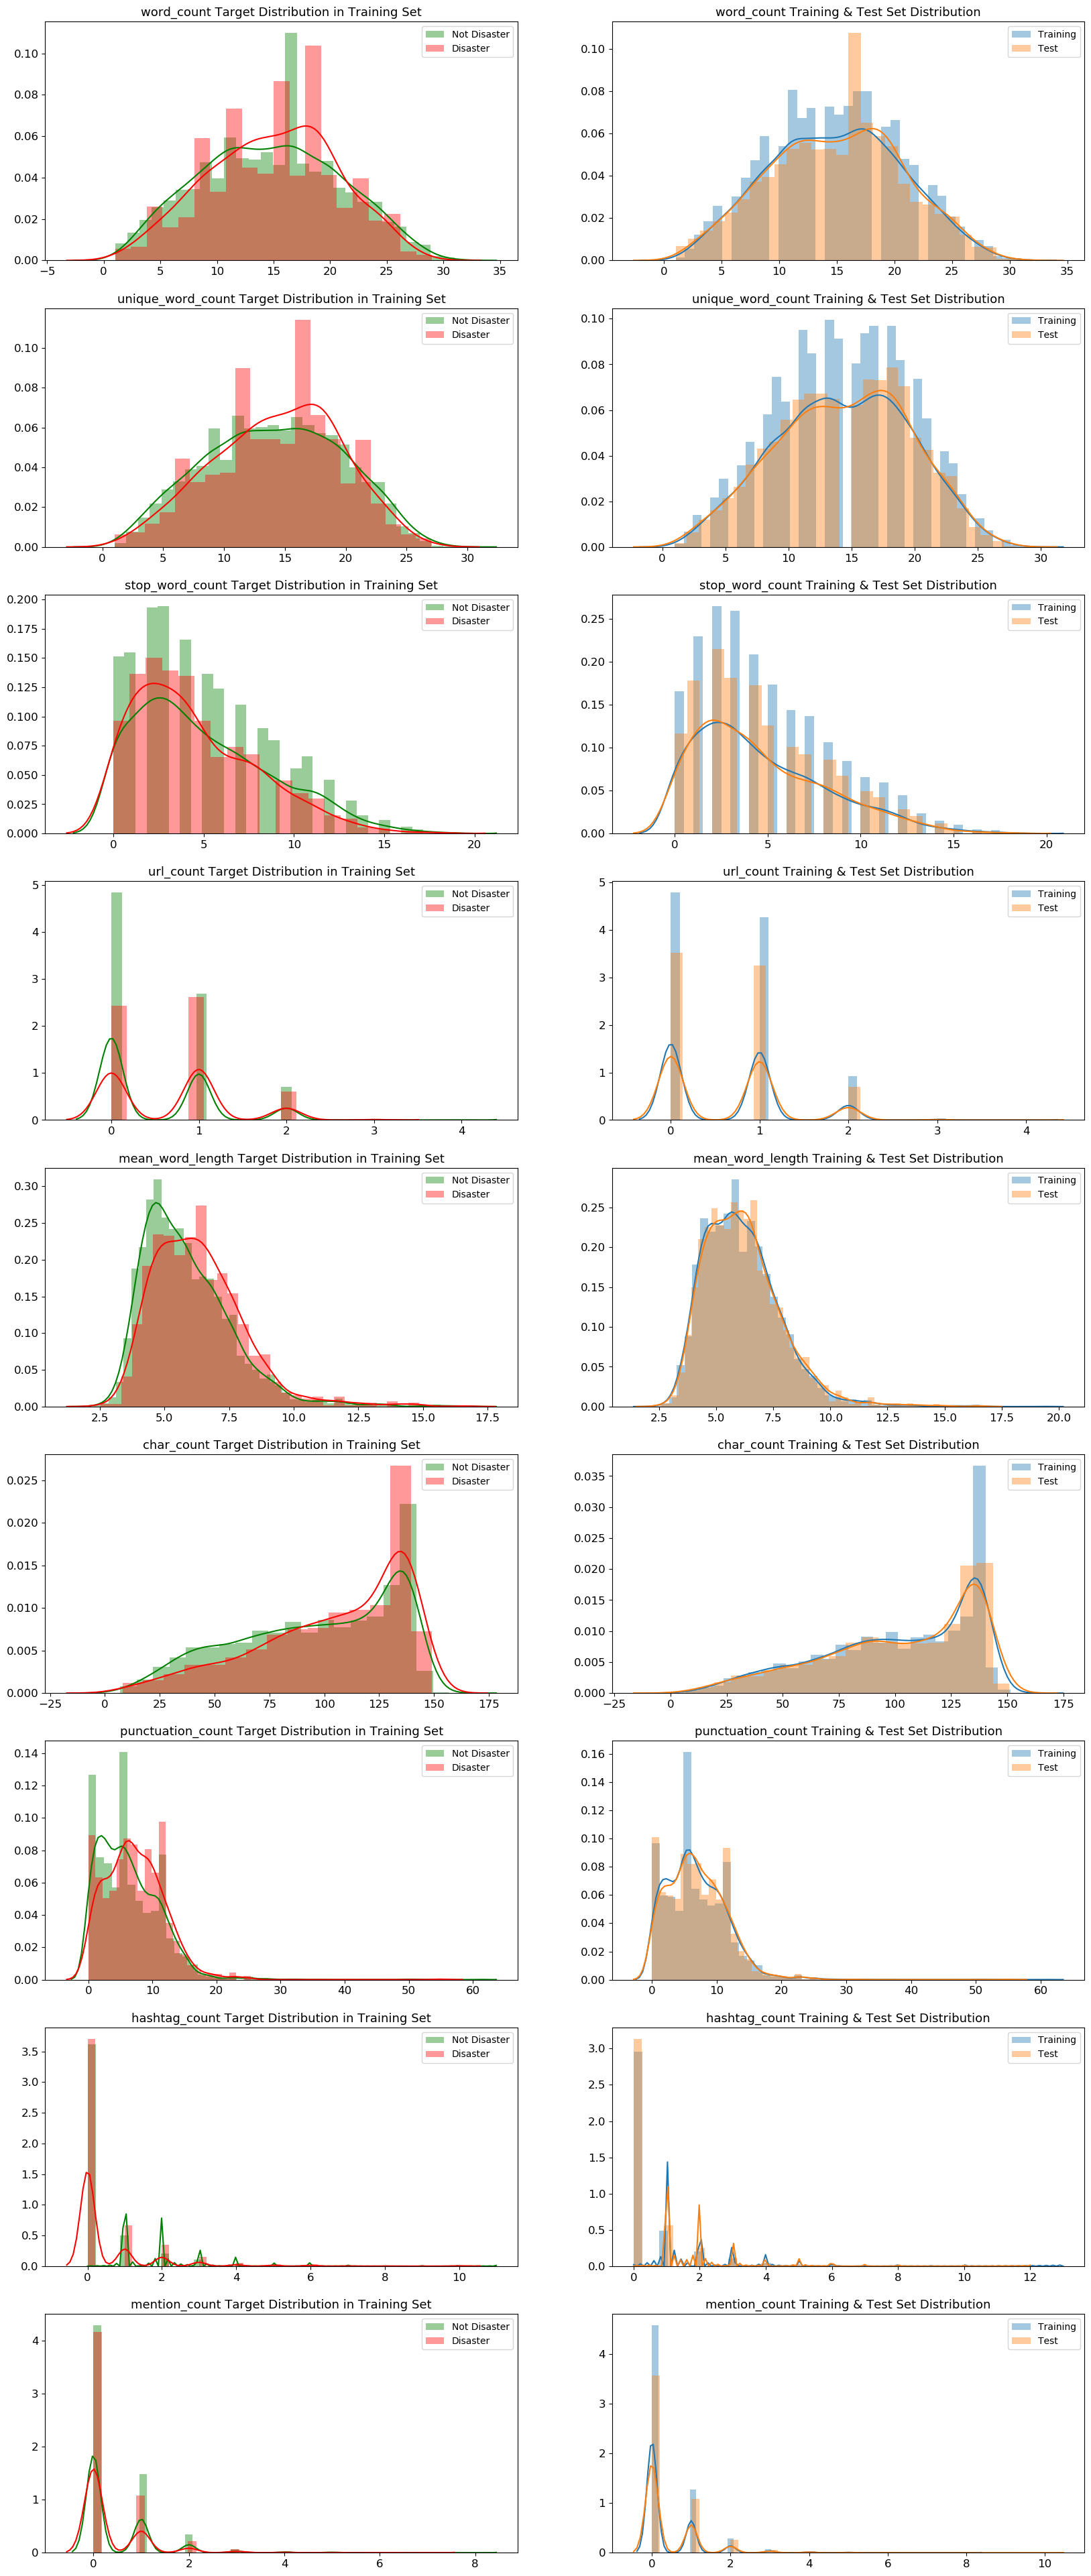

In [5]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(test.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()


##### The visualization provided show on the left feature-target distribution on train, on the right feature distribution in train and test
All of the new features have similar distributions in training and test set which also proves that training and test set are taken from the same sample.

word_count, unique_word_count, stop_word_count, mean_word_length, char_count, punctuation_count have very different distributions for disaster and non-disaster tweets. Those features might be useful in models.

All of the new features have information about target as well, but some of them are not good enough such as url_count, hashtag_count and mention_count. Because of this in the part we remove the missing values features (keyword, location) we are going to remove also these.

#### Target distribution
Class distributions are **57%** (4342 rows) for **Not Disaster** and **43%** (3271 rows) for **Disaster**. Classes are almost equally separated so they don't require any balancing for `target`.

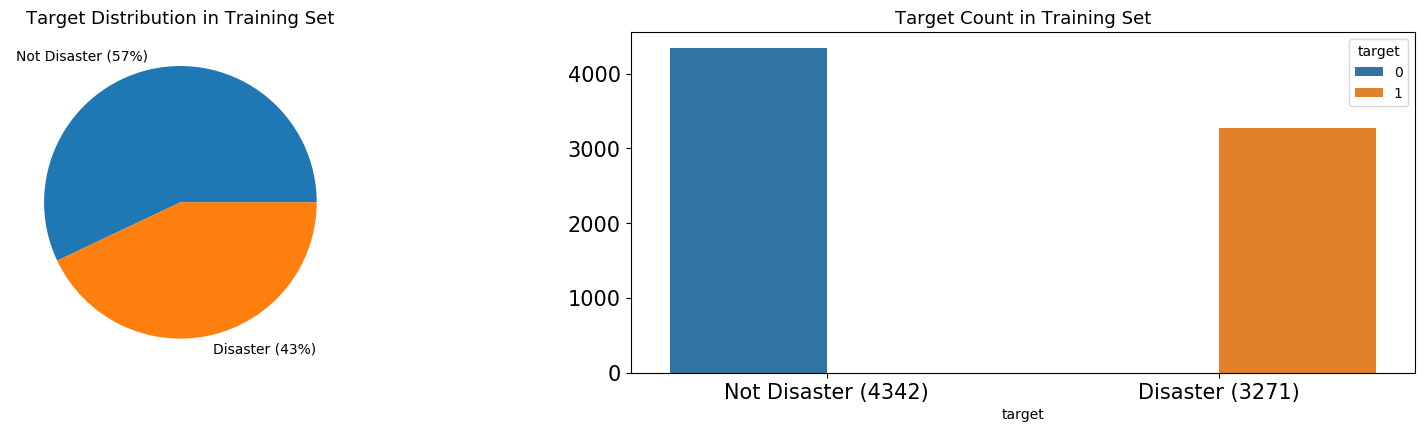

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()


### Data Exploration

##### Example of a tweet when is not a real disaster
This tweet is evidently a random tweet not dealing with anything related to a disaster

In [7]:
train[train["target"] == 0]["text"].values[5]

'this is ridiculous....'

##### Example of a tweet when is it talking about a real disaster
In this case we can evidently understand the opposite from the previus one

In [8]:
train[train["target"] == 1]["text"].values[4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

##### Small Dataset
Considering the dataset is composed of many retweets the actual information is even smaller, let's move on to try to use everything we can do in order to get the most from the dataset. Data cleaning is going to be crucial for us afterwords.

In [9]:
len(train)

7613

In [10]:
len(test)

3263

##### NA's treatment


- Before jumping on data cleaning a"location" has around 33% of missing values in both datasets so in our opinion it is better to drop this column. 
- Moreover, the keyword column has less than 1% of missing values but as we said before we remove it for performance reasons

In [11]:
del train['location']
del test['location']
del train['keyword']
del test['keyword']

#### New features removal
- url_count
- hashtag_count
- mention_count

In [12]:
del train['url_count']
del test['url_count']
del train['hashtag_count']
del test['hashtag_count']
del train['mention_count']
del test['mention_count']

### The dataset has a lot of unstructured tweets which should be "cleaned" in order to make an NLP model
Removing punctuations, stop words will save more computational power  and give us a higher accuracy since they are not related to sentiments.


#### 1- Removing Duplicates/Fixing the mislabled targets

We realized we have a lot of retweets, so after removing the https: which means a retweet. We tried removing the duplicates but we got a score lower by 0.02, so we will just fix the mislabled targets by creating a dataframe that has the mislabled

In [13]:
df_mislabeled = train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
df_mislabeled = df_mislabeled[df_mislabeled['target'] > 1]['target']
df_mislabeled.index.tolist()

['like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 'Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 'To fight bioterrorism sir.',
 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God is after America He is plaguing her\n \n#FARRAKHAN #QUOTE',
 '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'He came to a land which was engulfed in tribal war and turned it into a land 

In [14]:
#Refixing the target variable of the 18 mislabled texts 
train['target_relabeled'] = train['target'].copy() 

train.loc[train['text'] == 'like for the music video I want some real action shit like burning buildings and \
                                police chases not some weak ben winston shit', 'target_relabeled'] = 0
train.loc[train['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control\
                                you! #Afterlife', 'target_relabeled'] = 0
train.loc[train['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
train.loc[train['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally \
                                displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
train.loc[train['text'] == 'CLEARED:incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver \
                                Spring', 'target_relabeled'] = 1
train.loc[train['text'] == '#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe\
                                and hazardous for #humanconsumption', 'target_relabeled'] = 0
train.loc[train['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the \
                                opposite of terrorism!', 'target_relabeled'] = 0
train.loc[train['text'] == 'Who is bringing the tornadoes and floods. Who is bringing the climate change. God\
                                is after America He is plaguing her\n \n#FARRAKHAN #QUOTE', 'target_relabeled'] = 1
train.loc[train['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper.\
                                http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
train.loc[train['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building....\
                                    Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
train.loc[train['text'] == "wowo--=== 12000 Nigerian refugees repatriated from Cameroon", 'target_relabeled'] \
                                    = 0
train.loc[train['text'] == "He came to a land which was engulfed in tribal war and turned it into a land\
                              of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
train.loc[train['text'] == "Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do \
                             anything that leads to it #islam!", 'target_relabeled'] = 0
train.loc[train['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is \
                                                    by giving half a date in charity.'", 'target_relabeled'] = 0
train.loc[train['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
train.loc[train['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????",\
                        'target_relabeled'] = 0
train.loc[train['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description\
                            of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
train.loc[train['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while\
                            and you realise its been on 3G this whole time", 'target_relabeled'] = 0

#### 2- Removing HTTP links

We want to remove the links because they don't have any meanining in terms of vocabulary and the presence of the link doesn't affect the target, at first we wanted to create a new feature containing a binary 0/1 defining the presence or not of a link in the the text, later on we decided to not use it because was bad in terms of accuracy

In [15]:
# How many http words has this text?
train.loc[train['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [16]:
import re
    
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_links(text):
    no_link= pattern.sub('',text)
    return no_link

print("Example: ")
print(train['text'].iloc[33])
print(remove_links(train['text'].iloc[33]))

Example: 
#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. 


In [17]:
train['text'] = train['text'].apply(lambda x: remove_links(x))
test['text'] = test['text'].apply(lambda x: remove_links(x))

#### 3- Removing usernames (@)
Removing the usernames from the text, usernames are personal and don't affect the meaning of a sentence

In [18]:
pattern = re.compile('@[^\s]+')

def remove_username(text):
    no_username= pattern.sub('',text)
    return no_username
print("Example: ")
print(train['text'].iloc[65])
print(remove_links(train['text'].iloc[65]))

Example: 
@nxwestmidlands huge fire at Wholesale markets ablaze 
 huge fire at Wholesale markets ablaze 


In [19]:
train['text'] = train['text'].apply(lambda x: remove_username(x))
test['text'] = test['text'].apply(lambda x: remove_username(x))

#### 4- Expanding shortened words (don't to do not)
Maybe useful for stopwords definition and more accurate when dealing with non-shortned words, they have the same meaning but in terms of machine learning the machine would read them as different words. Same reasonment was done for upper/lowercase

In [20]:
from pycontractions import Contractions
import gensim.downloader as api

model = api.load("glove-twitter-25")
cont = Contractions(kv_model=model)
cont.load_models()


def expand_contractions(text):
    text = list(cont.expand_texts([text], precise=True))[0]
    return text

print("Example: ")
print(train['text'].iloc[7])
print(expand_contractions(train['text'].iloc[7]))

Example: 
I'm on top of the hill and I can see a fire in the woods...
I am on top of the hill and I can see a fire in the woods...


In [21]:
train['text'] = train['text'].apply(expand_contractions)
test['text'] = test['text'].apply(expand_contractions)

#### 5- Removal of punctuations

In [22]:
# Our dataset is related to tweets so we will have a lot of @ and # 
from textblob import TextBlob

def punctuations(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print("Example: ")
print(train['text'].iloc[3])
print(punctuations(expand_contractions(train['text'].iloc[3])))

Example: 
13,000 people receive #wildfires evacuation orders in California 
13,000 people receive wildfires evacuation orders in California


In [23]:
train['text'] = train['text'].apply(punctuations)
test['text'] = test['text'].apply(punctuations)

#### 6- Removal of accented characters (café to cafe)
In this dataset we do not have accented characters, this function will be used in case we are analyzing tweets 
from France or any country that has accented characters in their languages

In [24]:
import unidecode

def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text

# print(train['text'].iloc[3])
# print((remove_accented_chars(train['text'].iloc[3])))

In [25]:
train['text'] = train['text'].apply(remove_accented_chars)
test['text'] = test['text'].apply(remove_accented_chars)

#### 7- Removal of repeated letters

For the same reason of shortned words, repeated letters are some items in a text that don't mean anything, they are just 'typos' of the real word.

In [26]:
def remove_repeated(txt):
    cleaned = re.sub(r'(.)\1+', r'\1\1', txt)
    return cleaned

print("Example: ")
print(train['text'].iloc[28])
print((remove_repeated(train['text'].iloc[28])))

Example: 
Cooool
Cool


In [27]:
train['text'] = train['text'].apply(remove_repeated)
test['text'] = test['text'].apply(remove_repeated)

#### 8- Removal of Emojis

In [28]:
def remove_emoji(txt):
    emoji_pattern = re.compile("[" u"\U000024C2-\U0001F251"
                                       u"\U00002702-\U000027B0"
                                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                                                       u"\U0001F600-\U0001F64F"  # emoticons
                                                                                               "]+", flags = re.UNICODE)
    
    return emoji_pattern.sub(r'', txt)

train['text'] = train['text'].apply(remove_emoji)
test['text'] = test['text'].apply(remove_emoji)

#### 9- Removal of commonly used words and stopwords

Stopwords are very bad features to include in our model and in general into NLP models, those are words very common that appear 10 times more often than any other word in most of the texts. They don't have an actual important meaning for our purposes so we decided to remove them using a pre-made list of the most common stopwords.
We had also tried to build our own list of stopwords but gave us worse results

In [29]:
#Option1 

from nltk.corpus import stopwords
import re

def common_stopwords(tweet):
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = tweet.lower()
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    clean_mess = ' '.join(clean_mess)
    return clean_tokens

print(train['text'].iloc[12])
print(common_stopwords(train['text'].iloc[12]))

raining flooding Florida TampaBay Tampa 18 or 19 days I have lost count
['raining', 'flooding', 'florida', 'tampabay', 'tampa', 'or', 'days', 'i', 'have', 'lost', 'count']


In [30]:
#Option2 
# We decided not to import the stopwords from nltk.corpus since we wanted to keep the words that negate like no,not,,

# ### list of stop words that need to be removed
# stop_words = ['as', 'in', 'of', 'is', 'are', 'were', 'was', 'it', 'for', 'to', 'from', 'into', 'onto', 
#               'this', 'that', 'being', 'the','those', 'these', 'such', 'a', 'an','i','and','be','you',
#               'have','on','my','do','with', 'or','be','at','by','s','have']

# from nltk import word_tokenize
# import re

# def remove_stopwords(tweet):
#     tweet = re.sub('[^a-zA-Z]', ' ', tweet)
#     tweet = tweet.lower()
#     tokenized_words = word_tokenize(tweet)
#     temp = [word for word in tokenized_words if word not in stop_words]
# #     temp = ' '.join(temp)
#     return temp

# print(train['text'].iloc[12])
# print(remove_stopwords(train['text'].iloc[12]))


Choose between option A and B, we got a lower score using option B where we filter manually the stop words, so we will use option A

In [31]:
train['text'] = train['text'].apply(common_stopwords)
test['text'] = test['text'].apply(common_stopwords)

#### 10- Word Normalization

Many words in the text, like verbs, adverbs, or words in which the lexical use of it mad it to have a different spelling from the basic word. From this reason we normalized them in order to have the same feature (word) even if for example the verb was a past or a future form.

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
print((train['text'].iloc[12]))   
print(normalization((train['text'].iloc[12])))

['raining', 'flooding', 'florida', 'tampabay', 'tampa', 'or', 'days', 'i', 'have', 'lost', 'count']
['rain', 'flood', 'florida', 'tampabay', 'tampa', 'or', 'days', 'i', 'have', 'lose', 'count']


In [33]:
train['text'] = train['text'].apply(normalization)
test['text'] = test['text'].apply(normalization)

In [34]:
# After preprocessing, the text format
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']


0       our deeds be the reason of this earthquake may...
1                   forest fire near la ronge sask canada
2       all residents ask to shelter in place be be no...
3       people receive wildfires evacuation order in c...
4       just get send this photo from ruby alaska as s...
                              ...                        
7608    two giant crane hold a bridge collapse into ne...
7609    the out of control wild fire in california eve...
7610                         m utc km s of volcano hawaii
7611    police investigate after an e bike collide wit...
7612    the latest more home raze by northern californ...
Name: text, Length: 7613, dtype: object

We decided to create a dictionary in order to get the most frequent word and set it as a max feature when later applying the tf-idf to our text. We thought that it is gonna be a logical way to remove bias and diregard the most reptitive words with respect to less repetitive. We got a lower score

In [35]:
# #Create our dictionary 
# uniqueWordFrequents = {}
# for tweet in train.text:
#     for word in tweet.split():
#         if(word in uniqueWordFrequents.keys()):
#             uniqueWordFrequents[word] += 1
#         else:
#             uniqueWordFrequents[word] = 1
            
# #Convert dictionary to dataFrame
# uniqueWordFrequents = pd.DataFrame.from_dict(uniqueWordFrequents,orient='index',columns=['Word Frequent'])
# uniqueWordFrequents.sort_values(by=['Word Frequent'], inplace=True, ascending=False)
# uniqueWordFrequents.head(10)

In [36]:
# uniqueWordFrequents = uniqueWordFrequents[uniqueWordFrequents['Word Frequent'] >= 20]
# print(uniqueWordFrequents.shape)

##### Created features normalization

For the created features the normalization is of course different, we have numerical features so we decided to apply a min/max normalization in order to scale them between 0 and 1. This we thought was very important in order to run better models. If we think why, the answer is very easy:
- For running the model, we have to vectorize the text (tfdif) in numbers between 0 and 1
- If we add new features we want them to be at the same scale of the vectorized text

In [37]:
train['norm_word_count']=(train.word_count-train.word_count.min())/(train.word_count.max()-train.word_count.min())
train.norm_word_count

0       0.400000
1       0.200000
2       0.700000
3       0.233333
4       0.500000
          ...   
7608    0.333333
7609    0.633333
7610    0.233333
7611    0.600000
7612    0.400000
Name: norm_word_count, Length: 7613, dtype: float64

In [38]:
train['norm_unique_word_count']=(train.unique_word_count-train.unique_word_count.min())/(train.unique_word_count.max()-train.unique_word_count.min())
train.norm_unique_word_count

0       0.428571
1       0.214286
2       0.678571
3       0.250000
4       0.500000
          ...   
7608    0.357143
7609    0.571429
7610    0.250000
7611    0.642857
7612    0.428571
Name: norm_unique_word_count, Length: 7613, dtype: float64

In [39]:
train['norm_punctuation_count']=(train.punctuation_count-train.punctuation_count.min())/(train.punctuation_count.max()-train.punctuation_count.min())
train.norm_punctuation_count

0       0.016393
1       0.016393
2       0.049180
3       0.032787
4       0.032787
          ...   
7608    0.081967
7609    0.081967
7610    0.180328
7611    0.081967
7612    0.114754
Name: norm_punctuation_count, Length: 7613, dtype: float64

In [40]:
train['norm_stop_word_count']=(train.stop_word_count-train.stop_word_count.min())/(train.stop_word_count.max()-train.stop_word_count.min())
train.norm_stop_word_count

0       0.315789
1       0.000000
2       0.578947
3       0.052632
4       0.368421
          ...   
7608    0.105263
7609    0.473684
7610    0.052632
7611    0.263158
7612    0.157895
Name: norm_stop_word_count, Length: 7613, dtype: float64

In [41]:
train['norm_char_count']=(train.char_count-train.char_count.min())/(train.char_count.max()-train.char_count.min())
train.norm_char_count

0       0.413333
1       0.206667
2       0.840000
3       0.386667
4       0.540000
          ...   
7608    0.506667
7609    0.786667
7610    0.386667
7611    0.866667
7612    0.580000
Name: norm_char_count, Length: 7613, dtype: float64

In [42]:
train['norm_mean_word_length']=(train.mean_word_length-train.mean_word_length.min())/(train.mean_word_length.max()-train.mean_word_length.min())
train.norm_mean_word_length

0       0.124953
1       0.135889
2       0.166297
3       0.285366
4       0.131707
          ...   
7608    0.256763
7609    0.178537
7610    0.292683
7611    0.234917
7612    0.237523
Name: norm_mean_word_length, Length: 7613, dtype: float64

### TF_IDF
Converting the text to numerical numbers that is intended to reflect how important a word is to the document.

We tried using **CountVectorizer** but got a lower accuracy

In [43]:
#We got a higher score when using tfidf
# from sklearn.feature_extraction.text import CountVectorizer

# counVec = CountVectorizer(max_features = uniqueWordFrequents.shape[0])
# bagOfWords = counVec.fit_transform(train.text).toarray()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# if we used the uniqueWordFrequents, but we got a lower score with it

# tfidfconverter = TfidfVectorizer(max_features=uniqueWordFrequents.shape[0], min_df=5, max_df=0.7)  
tfidfconverter = TfidfVectorizer( min_df=5, max_df=0.7)  
X1 = tfidfconverter.fit_transform(train.text).toarray()
#if remove X, bagofwords should be X


### Trial 1
We decided first to try without using the newly created features, just using the converted "text" variable to see get an idea of how our accuracy is.

Splitting the ‘train’ data set into train and ‘test’ data for fitting the model using TFIDF:

In [45]:
from sklearn.model_selection import train_test_split

y = train['target']
print("X shape = ",X1.shape)
print("y shape = ",y.shape)

X_train , X_test , y_train , y_test = train_test_split(X1,y,test_size=0.20, random_state=55, shuffle =True)
print('data splitting successfully')

X shape =  (7613, 2438)
y shape =  (7613,)
data splitting successfully


### Model Training and Evaluation
Since we have a small amount of training data, We will try five different models. We will not try neural nets since we have small dataset. Therefore, will evaluate decisionTreeModel, gradientBoostingModel,  LogisticRegression,
          SVClassifier and multinomialNBModel. Giving along it a report of their performance over the training set and choosing the best one accordingly.

1- Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=55)

decisionTreeModel.fit(X_train,y_train)

print("decision Tree Classifier model run successfully")

decision Tree Classifier model run successfully


2- Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression(penalty='l2', 
                                        solver='saga', 
                                        random_state = 55)  

LogisticRegression.fit(X_train,y_train)

print("LogisticRegression Classifier model run successfully")

LogisticRegression Classifier model run successfully


3- Support Vector Machine Model

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

SVClassifier = SVC()

SVClassifier.fit(X_train,y_train)

print("SVClassifier model run successfully")

SVClassifier model run successfully


4- Gradient Boosting Model

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoostingModel = GradientBoostingClassifier()

gradientBoostingModel.fit(X_train,y_train)

print("gradient Boosting Classifier model run successfully")

gradient Boosting Classifier model run successfully


5- Multinomial Naive Bayes Model

In [50]:
from sklearn.naive_bayes import MultinomialNB

multinomialNBModel = MultinomialNB(alpha=0.1)
multinomialNBModel.fit(X_train,y_train)

print("multinomialNB model run successfully")

multinomialNB model run successfully


Running all models together

In [51]:
from sklearn.metrics import f1_score

#evaluation Details
models = [decisionTreeModel, gradientBoostingModel,  LogisticRegression,
          SVClassifier, multinomialNBModel]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(X_train, y_train))
    print(type(model).__name__,' Test Score is    : ' ,model.score(X_test, y_test))
    
    y_pred = model.predict(X_test)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(y_test,y_pred))
    print('--------------------------------------------------------------------------')

DecisionTreeClassifier  Train Score is   :  0.983743842364532
DecisionTreeClassifier  Test Score is    :  0.721602101116218
DecisionTreeClassifier  F1 Score is      :  0.665615141955836
--------------------------------------------------------------------------
GradientBoostingClassifier  Train Score is   :  0.7919540229885057
GradientBoostingClassifier  Test Score is    :  0.7557452396585687
GradientBoostingClassifier  F1 Score is      :  0.6568265682656826
--------------------------------------------------------------------------
LogisticRegression  Train Score is   :  0.8599343185550082
LogisticRegression  Test Score is    :  0.7971109652002626
LogisticRegression  F1 Score is      :  0.7392405063291139
--------------------------------------------------------------------------
SVC  Train Score is   :  0.9446633825944171
SVC  Test Score is    :  0.8069599474720945
SVC  F1 Score is      :  0.7411971830985915
--------------------------------------------------------------------------
Mult

We can notice that the best performing model is SVM followed by Logistic Regression which is normal for an NLP model. SVM is one of the simplest models where the models performance  is analyzed on various measures: accuracy, precision, recall, and f-measure. 

## Submission

In [52]:
sample_submission = pd.read_csv("sample_submission.csv")

In [53]:
test1 = tfidfconverter.transform(test.text).toarray()

In [54]:
sample_submission["target"] = SVClassifier.predict(test1)

KeyboardInterrupt: 

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv("submission.csv", index=False)

In [ ]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle


# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

We submitted on Kaggle on got an accuracy of **0.79959** with rank of 1261 using username: Cyril Gebara

We tried several different approaches to get a higher score, the more we filtered out (for example: removing duplicates our accuracy decreases 0.02), the less our accuracy gets.

The **best ways to increase the accuracy** is to:
- Get more training data
- Manually delete or relable the words that are misunderstood
- Bert
- N-gram
- POS Tagging: but we think that this is related to Sentiment Analysis more.
- NNs/LSTM
